# Regime Shift

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

In [2]:
data = pd.read_excel("Regime_shift_case0422.xlsx", index_col=1).T.iloc[1:, :]
data.head()

RS case number,Region,spatial scale (km2),Study Peiord start(y-1),Study Peiord end(y-1),Time resolution,Evidence,Shift Start year,Shift End Year,System,Regime before,...,analyze Methods,Standard,how to recognize (breakpoint/period),Patterns,reliability,others,Reference_1,Reference_2,NaN,NaN
1,Loess Plateau,NaN,1000,2020,100,NaN,1750,1750,human-land,fast expansion of cultivation,...,Correlation coefficient,Sig. change,NaN,NaN,NaN,NaN,"Wu et al., 2020",NaN,NaN,NaN
2,Loess Plateau,NaN,1000,2020,10,NaN,1950,1950,human-land,slow expansion of cultivation,...,Correlation coefficient,Sig. change,NaN,NaN,NaN,NaN,"Wu et al., 2020",NaN,NaN,NaN
3,Loess Plateau,NaN,1000,2020,5,NaN,1980,1980,human-land,land engineering for higher production,...,Correlation coefficient,Sig. change,NaN,NaN,NaN,NaN,"Wu et al., 2020",NaN,NaN,NaN
4,Loess Plateau,NaN,1000,2020,1,NaN,2000,2000,human-land,transition from cultivation to ecological cons...,...,Correlation coefficient,Sig. change,NaN,NaN,NaN,NaN,"Wu et al., 2020",NaN,NaN,NaN
5,Yellow River lower reaches,NaN,1950,2015,1,NaN,1970,1980,hydrology-sediment,Low efficiency regime (EH),...,EH formulation and GEH formulation,Related River Dynamics Standard,NaN,NaN,NaN,NaN,"Ma et al., 2020",NaN,NaN,NaN


In [3]:
data.Patterns.unique()
len(data.Patterns.unique())

data['Patterns'] = data['Patterns'].str.strip().str.split(";")

count_dic = {}
for items in data['Patterns'].dropna().values:
    for item in items:
        if item in count_dic:
            count_dic[item] += 1
        else:
            count_dic[item] = 1

freq = pd.Series(count_dic)

array([nan, 'accumulaiton of small disturbance',
       ' sustaintal structural change ',
       ' sustaintal structural change;huge disturbance',
       ' sustaintal dffect change;accumullation of small disturbance',
       'just phenomenon;', 'huge disturbance',
       ' sustaintal structural change;phenomenon', 'just phenomenon',
       'accumulation of small disturbance;substaintial effects change ',
       'difficult to decide(less evidence)', 'maybe huge disturbance',
       'maths', 'matehs',
       'difficult to decide(less evidence)/maybe huge disturbance',
       'huge disturbance ', 'subataintial structural change',
       'huge disturbance;substaintial sturctural change ',
       'substaintial sturctural change ', 'maybe just phenomenon'],
      dtype=object)

20

accumulaiton of small disturbance                             4
sustaintal structural change                                 15
huge disturbance                                             13
sustaintal dffect change                                      1
accumullation of small disturbance                            1
just phenomenon                                               6
                                                              4
phenomenon                                                    1
accumulation of small disturbance                             1
substaintial effects change                                   1
difficult to decide(less evidence)                            1
maybe huge disturbance                                       19
maths                                                        11
matehs                                                        1
difficult to decide(less evidence)/maybe huge disturbance     1
subataintial structural change          

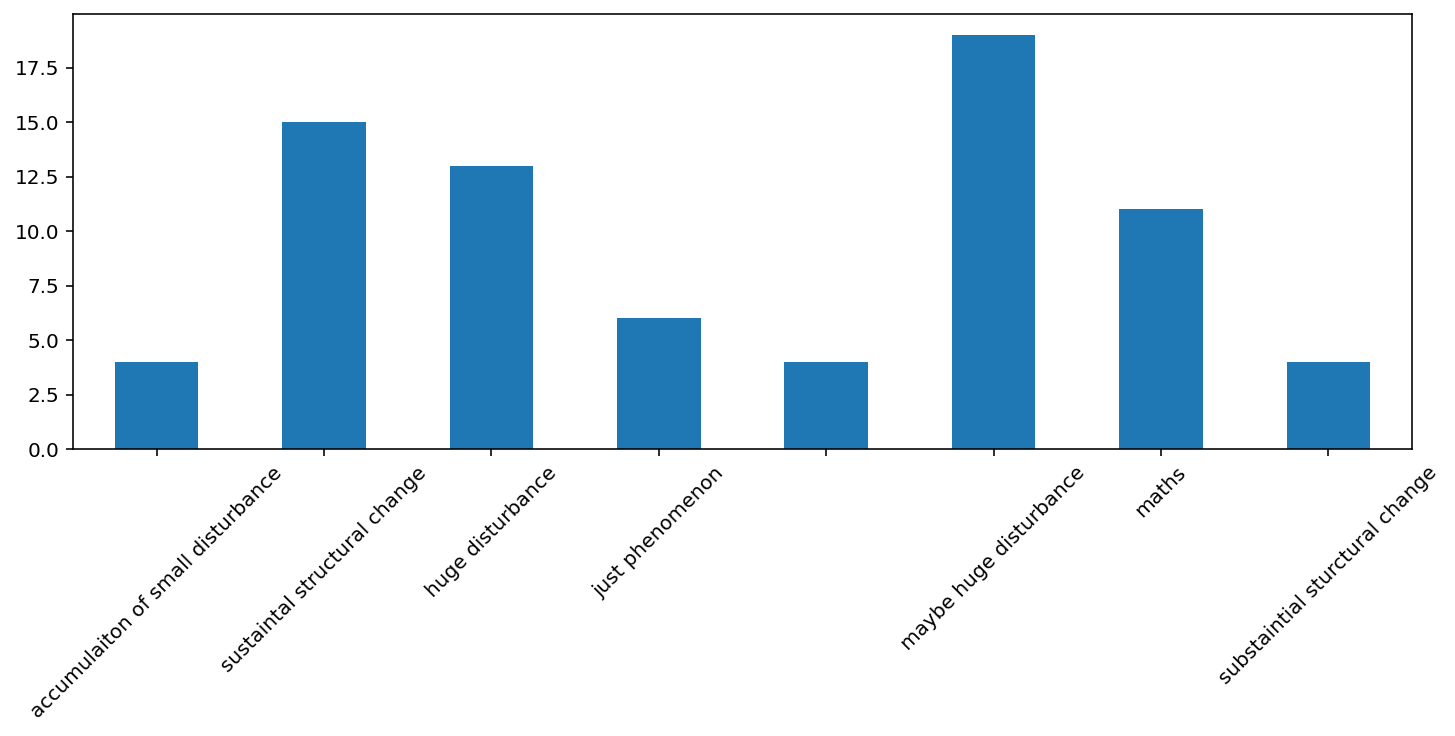

In [12]:
freq = pd.Series(count_dic)
freq[freq > 3].plot.bar(rot=45, figsize=(12, 4))

In [14]:
freq.sort_values(ascending=False)

maybe huge disturbance                                       19
sustaintal structural change                                 15
huge disturbance                                             13
maths                                                        11
just phenomenon                                               6
accumulaiton of small disturbance                             4
                                                              4
substaintial sturctural change                                4
sustaintal dffect change                                      1
accumullation of small disturbance                            1
maybe just phenomenon                                         1
phenomenon                                                    1
substaintial effects change                                   1
difficult to decide(less evidence)                            1
matehs                                                        1
difficult to decide(less evidence)/maybe

In [17]:
data.to_csv("cleaned_data.csv")

In [18]:
!pandas_profiling -h

usage: pandas_profiling [-h] [--version] [-s] [-m] [-e]
                        [--pool_size POOL_SIZE] [--title TITLE]
                        [--config_file CONFIG_FILE]
                        input_file [output_file]

Profile the variables in a CSV file and generate a HTML report.

positional arguments:
  input_file            CSV file (or other file type supported by pandas) to
                        profile
  output_file           Output report file. If empty, replaces the
                        input_file's extension with .html and uses that.

optional arguments:
  -h, --help            show this help message and exit
  --version             show program's version number and exit
  -s, --silent          Only generate but do not open report
  -m, --minimal         Minimal configuration for big data sets
  -e, --explorative     Explorative configuration featuring unicode, file and
                        image analysis
  --pool_size POOL_SIZE
                        Number of CP